In [16]:

import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import igraph as ig

os.listdir() #lister les fichiers du répertoire local



['Rapport jeu de données 2.ipynb',
 '.ipynb_checkpoints',
 'Rapport jeu de données 1.ipynb',
 'Rapport jeu de données 1.pdf',
 'Pop2x_v2.csv',
 'DataGeno2x.csv',
 'Brouillon_généalogie_rosier.ipynb',
 'Rapport jeu de données 2.pdf',
 'essai_4x.csv']

In [19]:
#Chargement des données et Preprocessing

data = pd.read_csv('essai_4x.csv',header=None,sep=';')

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,10,10,10,10,100,150,160,170,200,240,220,210,300,300,300,300,1,1
1,10,30,30,10,110,110,110,110,210,220,230,210,311,331,301,301,1,2
2,30,40,50,70,100,120,100,120,210,210,210,210,300,350,300,350,1,3
3,20,50,60,50,130,140,130,140,250,250,250,250,321,341,351,371,1,4
4,30,30,30,30,100,110,150,150,240,250,240,250,310,370,330,330,1,5
5,10,30,10,60,110,150,170,170,220,240,220,240,300,330,370,330,2,6
6,50,10,60,50,130,140,160,170,250,240,200,240,340,370,300,340,2,7
7,20,30,60,30,140,130,100,130,250,250,250,250,310,320,330,340,3,8
8,50,60,30,30,130,140,150,170,220,250,240,250,300,320,340,370,3,9
9,30,70,50,30,100,110,120,150,240,210,220,210,300,330,350,370,3,10


In [21]:

# Définir la colonne '1.1' comme indice
data = data.set_index(data.columns[-1])

data.index.name = 'index'


In [25]:
nouveaux_noms = {}
# Créez un dictionnaire de correspondance des noms de colonnes
for i in range(16):
    nouveaux_noms[i] = f'marqueur_{i//4 +1}.{i%4}'
    
    
nouveaux_noms[17] = 'generation'

data.rename(columns=nouveaux_noms,inplace=True)
data

,marqueur_1.0,marqueur_1.1,marqueur_1.2,marqueur_1.3,marqueur_2.0,marqueur_2.1,marqueur_2.2,marqueur_2.3,marqueur_3.0,marqueur_3.1,marqueur_3.2,marqueur_3.3,marqueur_4.0,marqueur_4.1,marqueur_4.2,marqueur_4.3,16
index,,,,,,,,,,,,,,,,,
1,10,10,10,10,100,150,160,170,200,240,220,210,300,300,300,300,1
2,10,30,30,10,110,110,110,110,210,220,230,210,311,331,301,301,1
3,30,40,50,70,100,120,100,120,210,210,210,210,300,350,300,350,1
4,20,50,60,50,130,140,130,140,250,250,250,250,321,341,351,371,1
5,30,30,30,30,100,110,150,150,240,250,240,250,310,370,330,330,1
6,10,30,10,60,110,150,170,170,220,240,220,240,300,330,370,330,2
7,50,10,60,50,130,140,160,170,250,240,200,240,340,370,300,340,2
8,20,30,60,30,140,130,100,130,250,250,250,250,310,320,330,340,3
9,50,60,30,30,130,140,150,170,220,250,240,250,300,320,340,370,3


In [5]:
# Générer les enfants virtuels à l'aide de deux parents pour un marqueur donné

def generEnf_Enf(P1,P2,m): 
    #P1 et P2 sont des int associés à l'indice des parents
    #m est est un entier compris entre 1 et 4 car il y a 4 caractéristiques
    
    P1_a,P1_b =data1.loc[P1,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #permet de stocker les allèles du parent 1 sur le marqueur m
    
    P2_a,P2_b =data1.loc[P2,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #permet de stocker les allèles du parent 2 sur le marqueur m
    return np.array([[P1_a,P2_a],[P1_a,P2_b],[P1_b,P2_a],[P1_b,P2_b]])

generEnf_Enf(1,2,1)

array([[10, 30],
       [10, 30],
       [20, 30],
       [20, 30]])

In [7]:
# donner pour un marqueur donné et une liste d'enfants virtuels pour un couple de parent
#le nombre  de fois ou l'enfant réel apparaît.


def compteEnf_virt_reel(P1,P2,E,m): 
    #m est est un entier compris entre 1 et 4
    # E est un entier pour une ligne donnée 
    
    E_virt = generEnf_Enf(P1,P2,m)
    #liste des enfants virtuel
    
    E_a,E_b =data1.loc[E,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #E_a et E_b permet de stocker les allèles de l'enfant sur le marqueur m
    c = 0 # c est un compteur
    
    for i in range(4): #Se déplacer sur les 4 cas possibles de la liste
        
        # Tester si la configuration enfant est présente dans la liste à permutation près 
        if list(E_virt[i,:]) == [E_a,E_b] or list(E_virt[i,:]) == [E_b,E_a]: 
            #list(E_virt[i,:]) convertir en liste tester l'égalité
            c+=1 #incrémante d'un si vrai
            
            #Permet de faire des affichages pour mieux comprendre
            '''print(E_virt[i,:], [E_a,E_b], list(E_virt[i,:]) == [E_a,E_b] )
            print('et')
            print(E_virt[i,:], [E_b,E_a], list(E_virt[i,:]) == [E_b,E_a])'''
            
    return c# nb de cas de ressemblance sur les 4 possibles
        
compteEnf_virt_reel(1,3,4,1)      

1

In [10]:
def Proba_Par_Enf(P1,P2,E):
    p=0
    I = range(1,7)
    if (P1 not in I) or (P2 not in I) or (E not in I):
        raise ValueError("les index rentrés ne sont pas bons")
    elif (data1.iloc[P1-1]['generation'] >= data1.iloc[E-1]['generation']) or (data1.iloc[P2-1]['generation'] >= data1.iloc[E-1]['generation']):
        # les indices python commence à 0 et non à 1, donc on abaise tout de 1 
        return p
    else:
        for m in range(1,5):
            p+= compteEnf_virt_reel(P1,P2,E,m)/4
        return p/4

#Un exemple 
Proba_Par_Enf(1,3,6)



0.0625

Text(0.5, 1.0, "matrice des probablités pour l'enfant 5")

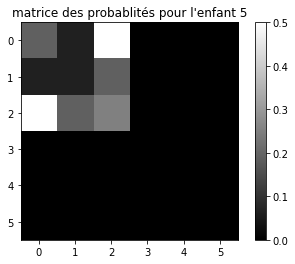

In [12]:
import matplotlib.pyplot as plt

def Matrix_Proba(E):
    n= len(data1)
    Matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Matrix[i,j] = Proba_Par_Enf(i+1,j+1,E)
    return Matrix
            
plt.imshow(Matrix_Proba(5),cmap='gray')
plt.colorbar()
plt.title("matrice des probablités pour l'enfant 5")

In [13]:
def Recup_Parents_max(E):
    M = Matrix_Proba(E)
    P1,P2 = np.unravel_index(np.argmax(M),M.shape)
    return [E,P1+1,P2+1,-np.log(M.max())]

Liste_pedigree = []
for e in range(4,7):
    Liste_pedigree.append(Recup_Parents_max(e))

Liste_pedigree

[[4, 1, 1, 1.6739764335716716],
 [5, 1, 3, 0.6931471805599453],
 [6, 4, 4, 0.5753641449035618]]

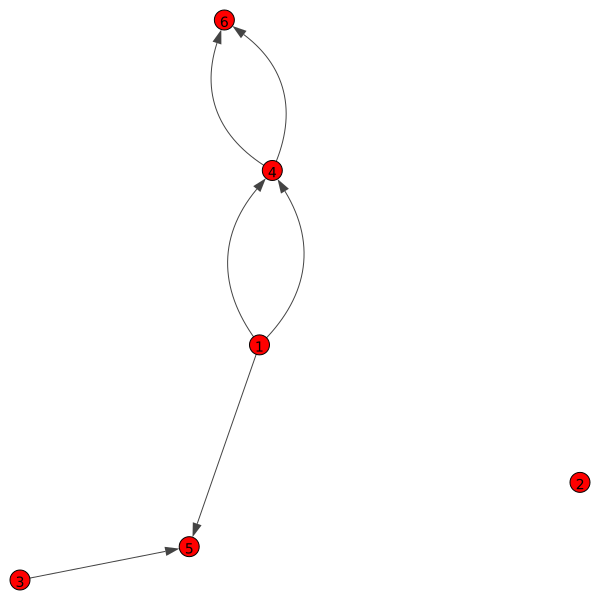

In [15]:

n = len(data1)
# Créez un graphe non orienté vide
g = ig.Graph(directed = True)
# Spécifiez un nom pour chaque nœud
node_names = [f'{i+1}' for i in range(n) ]

# Ajoutez 6 noeuds à l'arbre
g.add_vertices(len(node_names)) 




# Ajoutez des arêtes pour connecter les noeuds et former un arbre
for i in range(len(Liste_pedigree)):
    
    a,b,c = Liste_pedigree[i][0]-1, Liste_pedigree[i][1]-1,Liste_pedigree[i][2] -1
    
    g.add_edges([(b, a),(c,a)]) 
    # Par exemple, pour créer deux branche avec les flèches qui vont bien 
    
#layout = g.layout('circle')
    
ig.plot(g,vertex_label=node_names)#, bbox=(350,500))



In [39]:
# Générer les enfants virtuels à l'aide de deux parents pour un marqueur donné

def generEnf_Enf(P1,P2,m): 
    #P1 et P2 sont des int associés à l'indice des parents
    #m est est un entier compris entre 1 et 4 car il y a 4 caractéristiques
    
    P1_a,P1_b =data2.loc[P1,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #permet de stocker les allèles du parent 1 sur le marqueur m
    
    P2_a,P2_b =data2.loc[P2,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #permet de stocker les allèles du parent 2 sur le marqueur m
    return np.array([[P1_a,P2_a],[P1_a,P2_b],[P1_b,P2_a],[P1_b,P2_b]])


def compteEnf_virt_reel(P1,P2,E,m): 
    #m est est un entier compris entre 1 et 4
    # E est un entier pour une ligne donnée 
    
    E_virt = generEnf_Enf(P1,P2,m)
    #liste des enfants virtuel
    
    E_a,E_b =data2.loc[E,[f'marqueur_{m}.0',f'marqueur_{m}.1']] 
    #E_a et E_b permet de stocker les allèles de l'enfant sur le marqueur m
    c = 0 # c est un compteur
    
    for i in range(4): #Se déplacer sur les 4 cas possibles de la liste
        
        # Tester si la configuration enfant est présente dans la liste à permutation près 
        if list(E_virt[i,:]) == [E_a,E_b] or list(E_virt[i,:]) == [E_b,E_a]: 
            #list(E_virt[i,:]) convertir en liste tester l'égalité
            c+=1 #incrémante d'un si vrai
            
    return c# nb de cas de ressemblance sur les 4 possibles
        
def Proba_Par_Enf(P1,P2,E):
    p=0
    I = range(1,len(data2)+1)
    if (P1 not in I) or (P2 not in I) or (E not in I):
        raise ValueError("les index rentrés ne sont pas bons")
    elif (data2.iloc[P1-1]['generation'] >= data2.iloc[E-1]['generation']) or (data2.iloc[P2-1]['generation'] >= data2.iloc[E-1]['generation']):
        # les indices python commence à 0 et non à 1, donc on abaise tout de 1 
        return p
    else:
        for m in range(1,5):
            p+= compteEnf_virt_reel(P1,P2,E,m)/4
        return p/4

def Matrix_Proba(E):
    n= len(data2)
    Matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Matrix[i,j] = Proba_Par_Enf(i+1,j+1,E)
    return Matrix

def Recup_Parents_max(E):
    M = Matrix_Proba(E)
    P1,P2 = np.unravel_index(np.argmax(M),M.shape)
    return [E,P1+1,P2+1,-np.log(M.max())]

Liste_pedigree = []
for e in range(5,len(data2)+1):
    Liste_pedigree.append(Recup_Parents_max(e))

Liste_pedigree


[[5, 1, 4, 1.3862943611198906],
 [6, 2, 3, 1.1631508098056809],
 [7, 2, 4, 1.3862943611198906],
 [8, 2, 7, 1.3862943611198906],
 [9, 3, 6, 1.1631508098056809],
 [10, 3, 7, 0.8266785731844679],
 [11, 1, 9, 0.9808292530117262],
 [12, 7, 8, 0.6931471805599453],
 [13, 7, 12, 0.8266785731844679],
 [14, 6, 7, 1.1631508098056809],
 [15, 3, 3, 1.1631508098056809],
 [16, 2, 2, 1.3862943611198906],
 [17, 1, 12, 0.8266785731844679],
 [18, 3, 5, 1.1631508098056809],
 [19, 2, 3, 1.3862943611198906],
 [20, 2, 3, 1.1631508098056809],
 [21, 1, 15, 0.6931471805599453]]

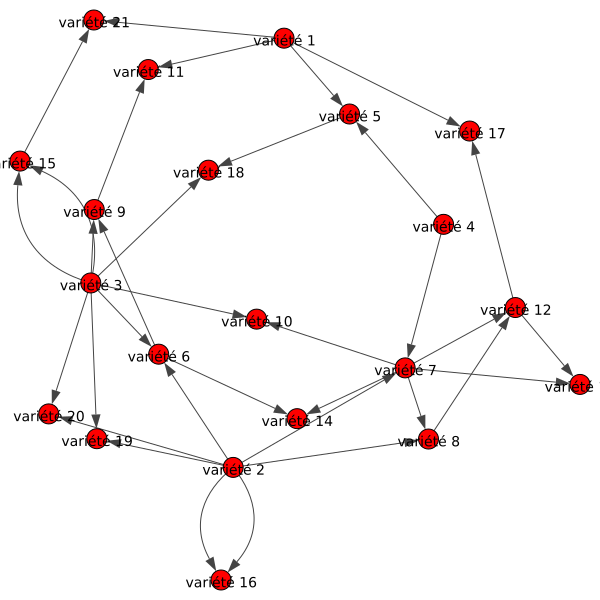

In [40]:

n = len(data2)
# Créez un graphe non orienté vide
g = ig.Graph(directed = True)
# Spécifiez un nom pour chaque nœud
node_names = [f'variété {i+1}' for i in range(n) ]

# Ajoutez 6 noeuds à l'arbre
g.add_vertices(len(node_names)) 




# Ajoutez des arêtes pour connecter les noeuds et former un arbre
for i in range(len(Liste_pedigree)):
    
    a,b,c = Liste_pedigree[i][0]-1, Liste_pedigree[i][1]-1,Liste_pedigree[i][2] -1
    
    g.add_edges([(b, a),(c,a)]) 
    # Par exemple, pour créer deux branche avec les flèches qui vont bien 
    
#layout = g.layout('circle')
    
ig.plot(g,vertex_label=node_names)#, bbox=(350,500))

